# Анализ товарного ассортимента 
### Задача и цель:
Интернет-магазин товаров для дома «Пока все ещё тут». Нужно проанализировать данные бизнеса, отработать корректные и некректные данные. Сделать вывод, на какие ассортименты и на каких клиентов бизнесу стоит обращать внимание, чтобы было больше заказов и клиентов. Показать насколько отличается тот или иной вариант. Выявить закономерности в данных и дать рекомендации

### Ход работы

#### Предобработка информации 
- отработать дубликаты
- отработать пустые значения
- удалить случаи когда на один индетификатор заказа несколько покупателей
#### Проведите исследовательский анализ данных

- выяснить как взаимосвязанны данные
- построить графики
- построить кореляции 
#### Проанализируйте торговый ассортимент;
- Классифицировать ассортимент и создать новый столбец (проведя ABC анализ)
- Выяснить как зависят данные от ассортимента.
- Выделите основной и дополнительный ассортимент
#### Сформулируйте и проверьте статистические гипотезы.
- Динамика роста заказа оснвого ассортимента в больше чем дополнительного
- Люди которые покупают много чего чаще возвращаются еще раз за покупкой  

### Вывод
- Сделать вывод, на какие ассортименты и на каких клиентов бизнесу стоит обращать внимание, чтобы было больше заказов и клиентов. Показать насколько отличается тот или иной вариант

### Загрузка данных и импортирование библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px 
from plotly import graph_objects as go
import warnings
import scipy.stats as stats
import numpy as np
import os
from pymystem3 import Mystem
from collections import Counter

In [2]:
pth1 = '/Users/marksuskov/ЯП/final/ecom_dataset_upd.csv'
pth2 = '/datasets/ecom_dataset_upd.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')


In [3]:
data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


###  Предобработка данных

In [4]:
display(data.duplicated().sum())

0

Полных дубликатов нет

In [5]:
display(data.isnull().sum())

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пустых знвчений нет

Проверю, чтобы не было случаев когда на один индетификатор заказа существует несколько покупателей, так как такого не может быть

In [6]:
data_id_customer_order = data[['customer_id','order_id']]
data_id_customer_order = data_id_customer_order.drop_duplicates() #удалил строчки где и заказ и пользователь совпадает
data_id_customer_order_pivot = data_id_customer_order.pivot_table(index = 'order_id',aggfunc = 'count')
data_id_customer_order_pivot.reset_index(inplace = True)
data_id_customer_order_pivot.sort_values(by = 'customer_id',ascending = False)
data_id_customer_order_pivot = data_id_customer_order_pivot[data_id_customer_order_pivot['customer_id'] >1]
data_id_customer_order_pivot

,order_id,customer_id
248,14872,2
516,68785,2
797,69283,2
817,69310,2
832,69345,2
862,69410,2
902,69485,3
933,69531,2
1066,69833,2
1200,70114,2


29 заказов имеют разных покупателей. 

Удалю номера этих заказов из исходной таблицы

In [7]:
data_id_customer_order_pivot = data_id_customer_order_pivot['order_id']

In [8]:
data = data.query('order_id not in @data_id_customer_order_pivot')

In [9]:
data.reset_index(drop = True,inplace = True)
display(data)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7380,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7381,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7382,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7383,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


проверю типы данных

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7385 non-null   int64  
 1   customer_id  7385 non-null   object 
 2   order_id     7385 non-null   int64  
 3   product      7385 non-null   object 
 4   quantity     7385 non-null   int64  
 5   price        7385 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 346.3+ KB


In [11]:
pd.options.mode.chained_assignment = None

In [12]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

Приведу названия товаров к одному регистру и заменю ё на е

In [13]:
data['product'] = data['product'].str.lower()
data['product'] = data['product'].replace('ё', 'е') 
data = data.replace(['ё'],'е')

Найду строки, где различается только дата и удалю их

In [14]:
data = data.drop_duplicates(subset=['customer_id', 'order_id','product','quantity','price'])
data

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7380,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0
7381,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0
7382,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0
7383,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0


Исследую данные на наличие выбросов

In [15]:
data['quantity'].value_counts()

quantity
1       4431
2        507
3        138
4        101
10        70
5         67
6         42
15        23
7         20
25        16
20        16
30        15
8         14
12        13
50         8
9          7
11         5
13         5
16         4
100        4
150        3
24         3
64         2
60         2
40         2
14         2
27         2
31         1
1000       1
70         1
300        1
22         1
26         1
18         1
80         1
59         1
334        1
57         1
43         1
23         1
29         1
45         1
37         1
200        1
96         1
140        1
170        1
17         1
65         1
Name: count, dtype: int64

удалю строки где quantity больше 100 

In [16]:
data = data[data['quantity']<100]
#data['quantity'].value_counts()

,price,count
24,38.0,292
79,120.0,229
86,135.0,219
107,188.0,194
92,150.0,188
61,90.0,150
91,149.0,128
72,112.0,125
84,134.0,115
56,82.0,113


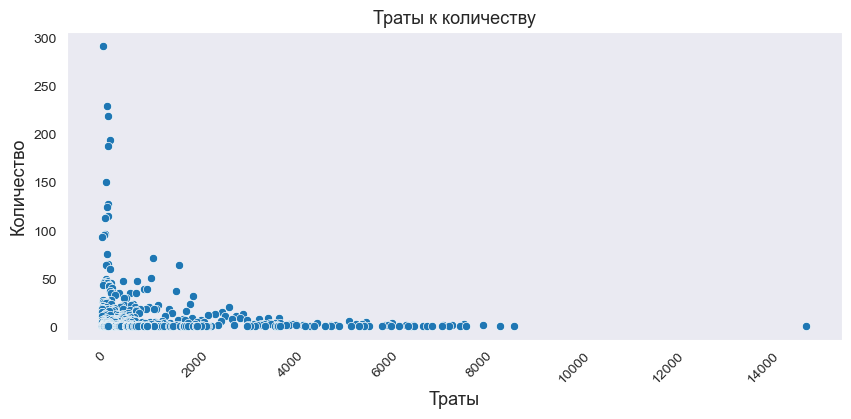

In [17]:
price_data = data.pivot_table(index = 'price', values = 'quantity', aggfunc = 'count')
price_data = price_data.reset_index()
price_data.columns = ('price','count')
price_data = price_data.sort_values(by = 'count',ascending = False)

display(price_data.head(10))

sns.set_style('dark')
plt.figure(figsize=(10, 4))

sns.scatterplot(x='price', y = 'count',data=price_data)
plt.xticks(rotation=45)
plt.title('Траты к количеству',size = 13)
plt.xlabel('Траты',size = 13)
plt.ylabel('Количество',size = 13)
#plt.grid()
plt.show()

удалю строки где price больше 8к


In [18]:
data = data[data['price']<8000]

В ходе предобработки янвых дубликатов и нулевых значений не выявлено. Были найдены неявные дубликаты и удалены. Отработаны типы данныхю. Отработаны выбросы

### Исследовательский анализ

Посмотрим как завсисит количество заказов от даты

добавлю в таблицу столбец год и месяц

In [19]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
#data

Построю график количество заказов по году

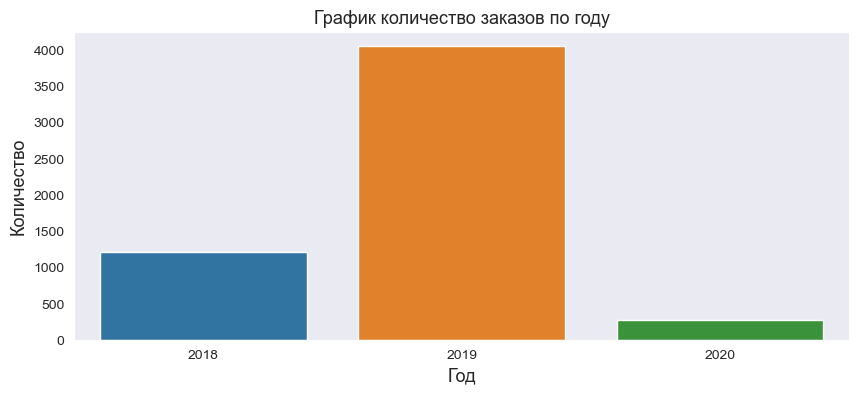

In [20]:
date_data = data.pivot_table(index = 'year', values = 'quantity', aggfunc = 'count')
date_data = date_data.reset_index()
date_data.columns = ('year','count')
#date_data = date_data.sort_values(by = 'count')
#display(date_data)

sns.set_style('dark')
plt.figure(figsize=(10, 4))

sns.barplot(x='year', y = 'count',data=date_data)
plt.title('График количество заказов по году',size = 13)
plt.xlabel('Год',size = 13)
plt.ylabel('Количество',size = 13)
#plt.grid()
plt.show()

Количество заказов в 2019 намного больше чем в другие года

Построй график количество заказов по месяцу

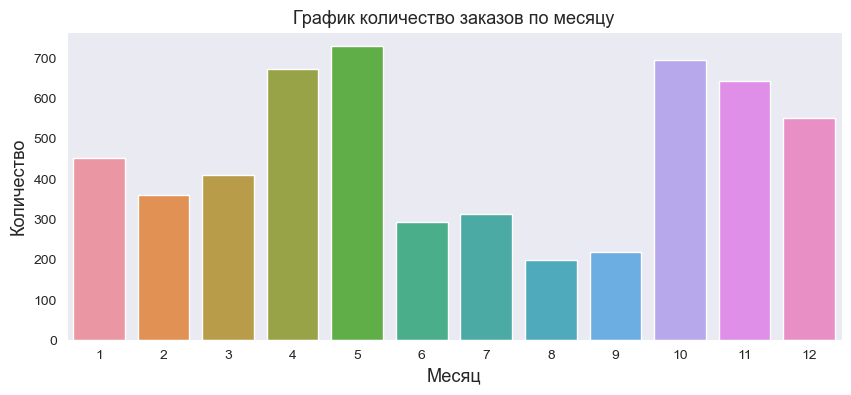

In [21]:
date_data = data.pivot_table(index = 'month', values = 'quantity', aggfunc = 'count')
date_data = date_data.reset_index()
date_data.columns = ('month','count')
#date_data = date_data.sort_values(by = 'count')
#display(date_data)

sns.set_style('dark')
plt.figure(figsize=(10, 4))

sns.barplot(x='month', y = 'count',data=date_data)
plt.title('График количество заказов по месяцу',size = 13)
plt.xlabel('Месяц',size = 13)
plt.ylabel('Количество',size = 13)
#plt.grid()
plt.show()

4,5,10,11 месяцы самые популярные, шестой особенно сильно выделяется. Самый большой провал в 8 и 9 месяцы

Найду самые популярные продукты

In [22]:
quantity_data = data.pivot_table(index = 'product', values = 'quantity', aggfunc = 'sum')
quantity_data = quantity_data.reset_index()
quantity_data.columns = ('product','quantity')
quantity_data = quantity_data.sort_values(by = 'quantity',ascending = False)

display(quantity_data.head(10))


,product,quantity
826,муляж яблоко зеленый 9 см полиуретан,148
766,муляж банан желтый 21 см полиуретан,109
2287,щетка-сметка 4-х рядная деревянная 300 мм (фиг...,105
2320,"ёрш унитазный с деревянной ручкой , ваир 1712012",103
1594,"стяжка оконная с болтом ст-55 цинк, 1108354",101
2073,цветок искусственный гвоздика пластиковая один...,97
669,крючок одежный 2-х рожковый серый металлик с п...,96
796,муляж лимон желтый 9 см полиуретан,92
1041,"петля приварная гаражная d 14х90 мм с шаром, 1...",90
1998,универсальный нож webber из нержавеющей стали ...,81


Муляж и щетка стали самыми продаваемыми товарами

Найду самые дорогие продукты по средней цене

In [23]:
quantity_data = data.pivot_table(index = 'product', values = 'price', aggfunc = 'median')
quantity_data = quantity_data.reset_index()
quantity_data.columns = ('product','price')
quantity_data = quantity_data.sort_values(by = 'price',ascending = False)

display(quantity_data.head(10))


,product,price
1570,стремянка 7 ступенчатая hailo 8040-707 xxl 13 ...,7724.0
1668,сумка-тележка хозяйственная rolser mnb017 fucs...,7679.0
1653,сумка-тележка хозяйственная rolser imx006 bass...,7679.0
1669,сумка-тележка хозяйственная rolser mou041 malv...,7597.0
252,гладильная доска leifheit airboard compact m p...,7424.0
2000,урна уличная стальная сальвадор 02.021.0 46х11...,7349.0
3,автоматическая щетка leifheit для мытья окон с...,7229.0
1624,сумка-тележка хозяйственная andersen scala sho...,7199.0
1703,сушилка для белья leifheit pegasus 200 deluxe ...,7004.0
2001,урна уличная стальная юпитер 02.012.0 38х38х60 см,6899.0


Найду самые дорогие продукты по сумме

In [24]:
quantity_data = data.pivot_table(index = 'product', values = 'price', aggfunc = 'sum')
quantity_data = quantity_data.reset_index()
quantity_data.columns = ('product','price')
quantity_data = quantity_data.sort_values(by = 'price',ascending = False)

display(quantity_data.head(10))

,product,price
1601,сумка-тележка 2-х колесная gimi argo синяя,50405.0
1625,сумка-тележка хозяйственная andersen scala sho...,28045.0
1681,сушилка meliconi stendy junior,27970.0
1671,сумка-тележка хозяйственная rolser pack gloria...,19674.0
1608,сумка-тележка 2-х колесная gimi galaxy черная,19568.0
1612,сумка-тележка 3-х колесная gimi tris floral синяя,18893.0
1630,сумка-тележка хозяйственная andersen treppenst...,18560.0
1628,сумка-тележка хозяйственная andersen scala sho...,18296.0
1610,сумка-тележка 2-х колесная складная gimi flexi...,18139.0
255,гладильная доска sarayli new elegant 125x45 см,17843.0


как мы видим, в топе общей выручки больше всего сумок-тележок

сделаю график корреляции трат и месяца

<Figure size 1000x400 with 0 Axes>

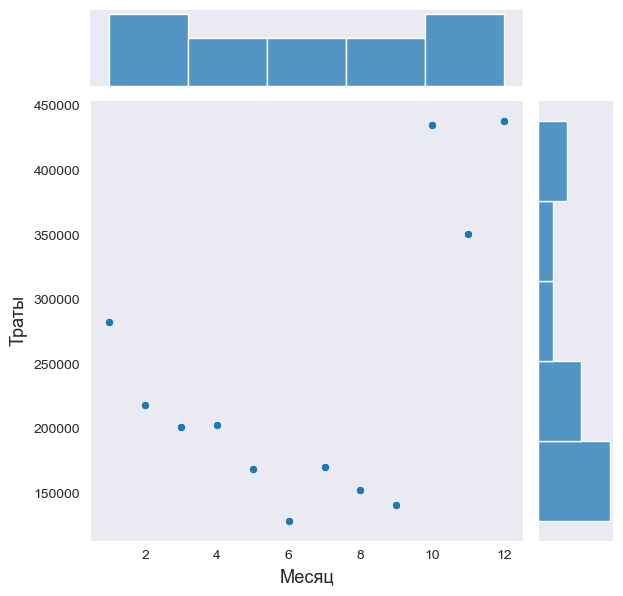

In [25]:
date_data = data.pivot_table(index = 'month', values = 'price', aggfunc = 'sum')
date_data = date_data.reset_index()
date_data.columns = ('month','price')
#date_data = date_data.sort_values(by = 'count')
#display(date_data)

sns.set_style('dark')
plt.figure(figsize=(10, 4))

sns.jointplot(x='month', y='price', data=date_data) 
plt.xlabel('Месяц',size = 13)
plt.ylabel("Траты",size = 13)
#plt.grid()
plt.show()

Можно увидеть как сильно зависят траты от месяца. Самые большие траты в 10 и 12 месяц, самые малые в 6, 8 и 9

В ходе исследовательского анализа данных, было выявлено:
- почти все заказы сделаны в 2019
- 4,5,10,11 месяцы самые популярные по количеству заказов, шестой особенно сильно выделяется. Самый большой провал в 8 и 9 месяцы
- Муляж и щетка стали самыми продаваемыми товарами
- В топе общей выручки больше всего сумок-тележок
- Сильно зависят траты от месяца. Самые большие траты в 10 и 12 месяц, самые малые в 6, 8 и 9

### Анализ торгового ассортимента

Классифицирую ассортимент и создам новый столбец

In [26]:
data

,date,customer_id,order_id,product,quantity,price,year,month
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10
...,...,...,...,...,...,...,...,...
7380,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,2020,1
7381,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,2020,1
7382,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,2020,1
7383,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,2020,1


In [27]:
m = Mystem()

In [28]:
unique_product = data['product'].unique() #все уникальные значения товаров

unique_product_string = ' '.join(unique_product) #Объединение в единую строку

lemmas = m.lemmatize(unique_product_string) #применю функцию библиотеки pymystem3

print(Counter(lemmas))


Counter({' ': 17565, 'см': 1059, ', ': 1058, '-': 965, 'для': 542, ',': 295, 'в': 272, 'd': 260, 'л': 252, 'с': 250, 'рассада': 221, '5': 190, ' (': 172, 'белый': 171, 'сорт': 171, 'кассета': 170, 'шт': 169, '0': 164, '12': 146, 'красный': 142, 'белье': 141, ') ': 141, 'доска': 132, '/': 132, 'горшок': 130, '9': 123, 'цветок': 117, 'сушилка': 116, 'объем': 114, 'гладильный': 113, '2': 112, '6': 110, '1': 108, 'тележка': 105, 'по': 101, '4': 101, 'томат': 100, '10': 99, '. ': 98, 'сумка': 95, 'диам': 95, 'помидор': 93, '*': 90, '№': 88, 'пеларгония': 86, 'розовый': 84, '3': 82, 'из': 81, 'и': 81, 'luminarc': 79, '7': 75, 'gimi': 74, 'хозяйственный': 74, 'ника': 74, 'среднеспелый': 73, '20': 72, 'коврик': 72, 'ванный': 72, 'кухня': 71, 'зелень': 68, 'муляж': 68, 'роза': 68, 'черный': 67, 'мл': 66, 'махровый': 62, 'г': 61, 'зональный': 61, 'h': 60, 'чехол': 60, 'синий': 60, 'искусственный': 60, 'пластмассовый': 59, 'attribute': 59, 'м': 59, '100': 58, 'однолетний': 57, 'штора': 54, 'штука

In [29]:
# составления словаря
dictinory = {'герань': 'растение', 'циперус': 'растение', 'пеларгония': 'растение', 'томат' : 'съедобное растение' , 'петуния': 'растение',
'однолетний': 'растение', 'роза': 'растение', 'калибрахоа': 'растение', 'бакопа': 'растение', 'базилик': 'растение',
'дыня': 'съедобное растение', 'мята': 'растение', 'фуксия': 'растение', 'флокс': 'растение', 'эвкалипт': 'растение', 'декабрист': 'растение',
'цикламен': 'растение', 'новогодний': 'растение', 'фиалка': 'растение', 'вербена': 'растение', 'арбуз': 'съедобное растение', 
 'примула': 'растение', 'пуансеттия': 'растение', 'капуста': 'съедобное растение', 'комнатный': 'растение', 'антуриум': 'растение',
'циперус': 'растение', 'бальзамин': 'растение', 'колокольчик': 'растение', 'тимьян': 'растение', 'хлорофитум': 'растение',
'огурец': 'съедобное растение', 'лобелия': 'растение', 'хризантема': 'растение', 'лаванда': 'растение', 'космея': 'растение', 
'окномойка': 'растение', 'лавр': 'растение', 'мирт': 'растение', 'бегония': 'растение', 'эхеверия': 'растение', 
'подарочный': 'растение', 'клубника': 'съедобное растение', 'патиссон': 'растение', 'многолетний': 'растение', 'петрушка': 'растение', 
'розмарин': 'растение', 'спатифиллум': 'растение', 'мединилла': 'растение', 'дендробиум': 'растение', 'мимоза': 'растение',
'аптения': 'растение', 'рассада': 'рассада', 'муляж': 'растение', 'цветок': 'растение', 'сумка': 'хоз. товары', 'тележка': 'хоз. товары', 
'сушилка': 'хоз. товары', 'настенный': 'хоз. товары', 'таз': 'хоз. товары', 'ерш': 'хоз. товары', 'штора': 'хоз. товары',
'гладильный': 'хоз. товары', 'ковер': 'хоз. товары', 'полка': 'хоз. товары', 'стремянка': 'хоз. товары', 
'карниз': 'хоз. товары', 'лестница': 'хоз. товары','швабра': 'хоз. товары','чайник': 'кухонные приборы','ложка': 'кухонные приборы',
'салфетка': 'кухонные приборы','десертный': 'кухонные приборы','кухонный': 'кухонные приборы','обеденный': 'кухонные приборы','посуда': 'кухонные приборы',
'посуда': 'кухонные приборы','суповой': 'кухонные приборы','столовый': 'кухонные приборы','минеральный': 'кухонные приборы','средство': 'кухонные приборы',
'кухня': 'кухонные приборы','тарелка': 'кухонные приборы','скатерть': 'кухонные приборы','нержавеющий': 'кухонные приборы','круглый': 'кухонные приборы','ассортимент': 'кухонные приборы',
'прямоугольный': 'кухонные приборы','салатник': 'кухонные приборы','пищевой': 'кухонные приборы','нож': 'кухонные приборы','стеклянный': 'кухонные приборы','контейнер': 'кухонные приборы',
'десертный': 'кухонные приборы','керамический': 'кухонные приборы','чайный': 'кухонные приборы','сковорода': 'кухонные приборы','паста': 'кухонные приборы'}

In [30]:
# создаем функцию, которая првоеряет в столбце значение из списка, при нахождении значения записывает в столбце категория
def choose_group(choose_group):
        purpose_list = m.lemmatize(choose_group)
        for name in purpose_list: 
            if name in (dictinory):
                purpose_string =  dictinory[name]
                return purpose_string
            else: purpose_string = 'другое'
            return purpose_string 

#Создам новый столбец и применю к нему функцию
data['product_type'] = data['product'].apply(choose_group)

In [31]:
data

,date,customer_id,order_id,product,quantity,price,year,month,product_type
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,растение
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,растение
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,другое
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,другое
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,растение
...,...,...,...,...,...,...,...,...,...
7380,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,2020,1,съедобное растение
7381,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,2020,1,растение
7382,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,2020,1,другое
7383,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,2020,1,другое


Выделю основной и дополнительный ассортимент

Проведу ABC анализ, чтобы определить основной или дополнительный ассортимент

In [32]:
# создаем сводную таблицу category_abc, строки - товары, значения - сумма выручки
category_abc_price = data.pivot_table(index = 'product', values = 'price', 
              aggfunc = 'sum').sort_values(by='price', ascending=False)

# добавляем таблицу столбец percent с процентом выручки товара
category_abc_price['percent']=round((category_abc_price['price']/
                               sum(category_abc_price['price']))*100,4)

# расчитываем накомпительный процент выручки - столбец accumulated_percent
category_abc_price['accumulated_percent']=category_abc_price['percent'].cumsum()

# присваиваем группу ABC по накопленному процент выручки
category_abc_price['abc_group'] = category_abc_price['accumulated_percent'].apply(lambda abc: 
              'A' if abc < 80 else('B' if  80 <= abc < 95 else 'C'))

category_abc_price = category_abc_price.reset_index()
#display(data)
#category_abc_price

data = data.merge(category_abc_price, on='product')
display(data)
category_abc_price


,date,customer_id,order_id,product,quantity,price_x,year,month,product_type,price_y,percent,accumulated_percent,abc_group
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,растение,568.0,0.0196,90.1704,B
1,2018-10-11 13:00:00,4d59d9e7-55be-43a0-88c4-8e7261c5c6d5,68610,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,растение,568.0,0.0196,90.1704,B
2,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,растение,568.0,0.0196,90.1704,B
3,2019-02-10 10:00:00,0a4e4711-5cb7-4bae-93cf-6731902708de,70186,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2019,2,растение,568.0,0.0196,90.1704,B
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,растение,388.0,0.0134,93.5692,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,2019-11-25 01:00:00,95d6ad00-1c3a-492d-82d7-40a482334a6e,103221,миксер электрический погружной delta dl-5061 б...,2,959.0,2019,11,другое,959.0,0.0332,83.5422,B
5522,2019-12-03 07:00:00,d7e993fe-b99e-411a-8dcb-f6abaf50a2a2,108589,"щетка для посуды *оля*, мультипласт 1807010",1,26.0,2019,12,другое,26.0,0.0009,99.9615,C
5523,2019-12-21 15:00:00,9a1c5133-891a-4f70-85ec-e07f0ba3ec48,111100,"ручка-скоба рс-100 белая *трибатрон*, 1108035",1,29.0,2019,12,другое,29.0,0.0010,99.9478,C
5524,2020-01-03 20:00:00,c8682085-541f-41b7-9ae1-263284a492f4,111735,шеффлера голд капелла d-12 см h-25 см,1,149.0,2020,1,другое,149.0,0.0052,98.3209,C


,product,price,percent,accumulated_percent,abc_group
0,сумка-тележка 2-х колесная gimi argo синяя,50405.0,1.7436,1.7436,A
1,сумка-тележка хозяйственная andersen scala sho...,28045.0,0.9701,2.7137,A
2,сушилка meliconi stendy junior,27970.0,0.9675,3.6812,A
3,сумка-тележка хозяйственная rolser pack gloria...,19674.0,0.6805,4.3617,A
4,сумка-тележка 2-х колесная gimi galaxy черная,19568.0,0.6769,5.0386,A
...,...,...,...,...,...
2318,петрушка итальянский гигант 2 г 4660010776553,10.0,0.0003,99.9996,C
2319,"цинния коралловая красавица 0,2 г 4660010773323",10.0,0.0003,99.9999,C
2320,"цинния оранжевый король 0,5 г 4660010770520",10.0,0.0003,100.0002,C
2321,"огурец засолочный 0,3 г 4660010776102",10.0,0.0003,100.0005,C


In [33]:
data['abc_group'].value_counts()

abc_group
A    2183
C    1673
B    1670
Name: count, dtype: int64

A - основная ктегероия, B - второстепенная, С - дополнительная

In [34]:
#data['type_grade'] = data['product_type'].apply(lambda x:"дополнительный" if x =='другое' else 'основной')

Найду самый популярный тип продуктов

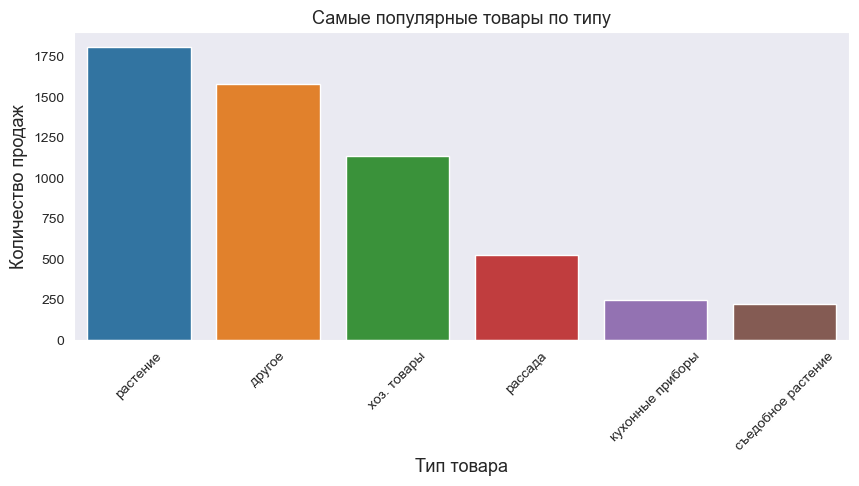

In [35]:
quantity_data = data.pivot_table(index = 'product_type', values = 'quantity', aggfunc = 'count')
quantity_data = quantity_data.reset_index()
quantity_data.columns = ('product_type','quantity')
quantity_data = quantity_data.sort_values(by = 'quantity',ascending = False)


sns.set_style('dark')
plt.figure(figsize=(10, 4))

sns.barplot(x='product_type', y = 'quantity',data=quantity_data)
plt.xticks(rotation=45)
plt.title('Самые популярные товары по типу',size = 13)
plt.xlabel('Тип товара',size = 13)
plt.ylabel('Количество продаж',size = 13)
#plt.grid()
plt.show()

Растение, хоз товары и прочие стали самыми популярными типами

Найду самые дорогие типы продуктов по средней цене

In [36]:
quantity_data = data.pivot_table(index = 'product_type', values = 'price_x', aggfunc = 'median')
quantity_data = quantity_data.reset_index()
quantity_data.columns = ('product_type','price_x')
quantity_data = quantity_data.sort_values(by = 'price_x',ascending = False)

display(quantity_data)

,product_type,price_x
5,хоз. товары,1049.0
1,кухонные приборы,202.0
0,другое,194.0
3,растение,135.0
2,рассада,120.0
4,съедобное растение,38.0


Хоз товары стали самыми дороги по медиане

найду тип товара, который принес самую большую сумму за все продажи

,product_type,price_x
5,хоз. товары,1.688171e+06
0,другое,7.477248e+05
3,растение,2.812430e+05
1,кухонные приборы,1.073740e+05
2,рассада,5.723150e+04
4,съедобное растение,9.157000e+03


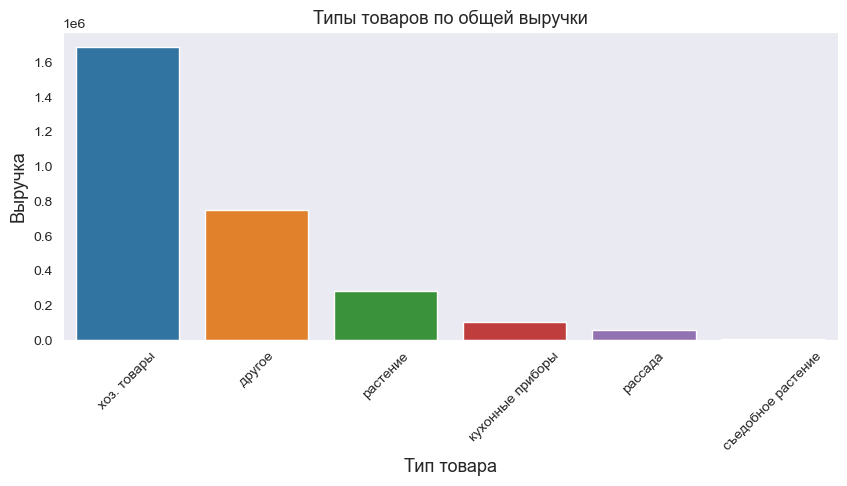

In [37]:
quantity_data = data.pivot_table(index = 'product_type', values = 'price_x', aggfunc = 'sum')
quantity_data = quantity_data.reset_index()
quantity_data.columns = ('product_type','price_x')
quantity_data = quantity_data.sort_values(by = 'price_x',ascending = False)

display(quantity_data)

sns.set_style('dark')
plt.figure(figsize=(10, 4))

sns.barplot(x='product_type', y = 'price_x',data=quantity_data)
plt.xticks(rotation=45)
plt.title('Типы товаров по общей выручки',size = 13)
plt.xlabel('Тип товара',size = 13)
plt.ylabel('Выручка',size = 13)
#plt.grid()
plt.show()

Категория хоз товаы - приносит бизнесу больше всего денег

Рассморю соотношения товаров основных и дополнительных

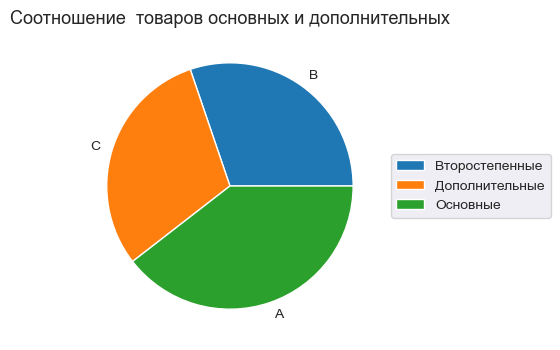

In [38]:

chain_data = data.pivot_table(index = 'abc_group', values = 'quantity', aggfunc = ['count'])
chain_data = chain_data.reset_index()

chain_data.columns = ('abc_group','count')

chain_data = chain_data.sort_values(by = 'count')
#display(chain_data)

sns.set_style('dark')
plt.figure(figsize=(10, 4))

plt.pie(chain_data['count'], labels =  chain_data['abc_group'])
plt.title('Cоотношение  товаров основных и дополнительных',size = 13)
plt.xlabel('',size = 10)
plt.ylabel('',size = 10)
plt.legend(["Второстепенные", "Дополнительные",'Основные'],
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Основные товары занимают чуть больше 30% всех товаров

проверю по 5 основным товарам их покупку в разые месяцы

product_type,другое,кухонные приборы,рассада,растение,съедобное растение,хоз. товары
month,,,,,,
1,179.0,40.0,20.0,98.0,17.0,96.0
2,102.0,22.0,16.0,131.0,NaN,88.0
3,98.0,13.0,28.0,193.0,1.0,75.0
4,141.0,5.0,102.0,262.0,94.0,67.0
5,88.0,8.0,239.0,274.0,73.0,46.0
6,88.0,6.0,26.0,118.0,3.0,52.0
7,93.0,5.0,24.0,103.0,19.0,68.0
8,55.0,6.0,7.0,59.0,NaN,72.0
9,68.0,9.0,9.0,70.0,1.0,60.0


<Figure size 1000x400 with 0 Axes>

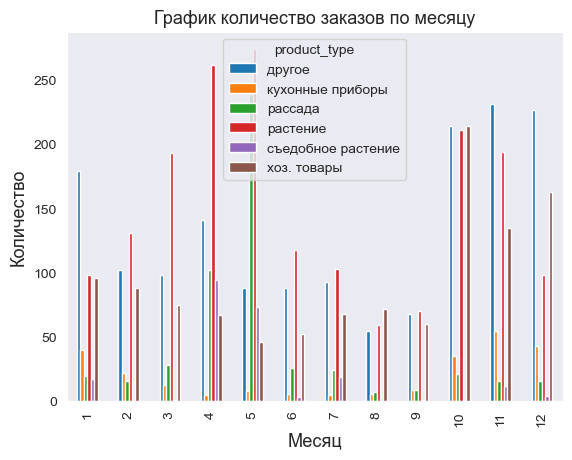

In [39]:

date_data = data.pivot_table(index = 'month',columns = 'product_type', values = 'quantity', aggfunc = 'count')
#date_data = date_data.reset_index()
#date_data.columns = ('month','count')
#date_data = date_data.sort_values(by = 'quantity',ascending = False)
display(date_data)

sns.set_style('dark')
plt.figure(figsize=(10, 4))

date_data.plot.bar()
plt.title('График количество заказов по месяцу',size = 13)
plt.xlabel('Месяц',size = 13)
plt.ylabel('Количество',size = 13)
#plt.grid()
plt.show()

- с января по мая сильно растет популярность расстений, потом этот показатель падает и снова популярен в октябре и ноябре
- рассада набирает популяность в апреле и достигает максимума в мая
- хоз товары в три последние месяцы популярна
- съедобные растения в 1,2,4 месяце популярны

Проверю траты по группам

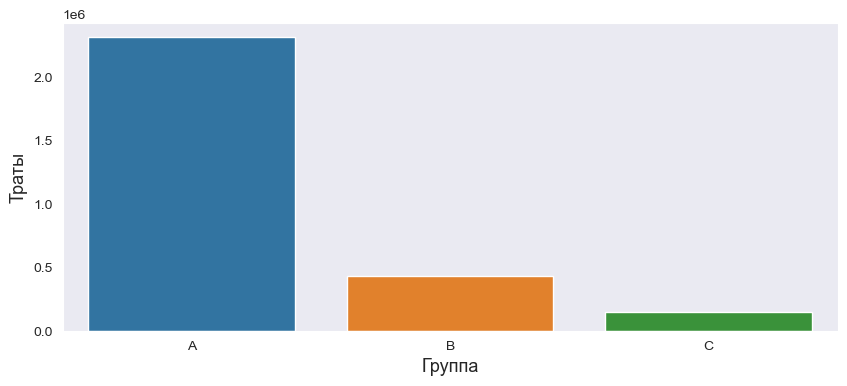

In [40]:
date_data = data.pivot_table(index = 'abc_group', values = 'price_x', aggfunc = 'sum')
date_data = date_data.reset_index()
date_data.columns = ('abc_group','price_x')
#date_data = date_data.sort_values(by = 'count')
#display(date_data)

sns.set_style('dark')
plt.figure(figsize=(10, 4))

sns.barplot(x='abc_group', y='price_x', data=date_data) 
plt.xlabel('Группа',size = 13)
plt.ylabel("Траты",size = 13)
#plt.grid()
plt.show()

как мы видим основной зааботок компания получает именно с основной категории

Посмотрю количество товаров в категориях в зависимости от типов товара 

product_type,abc_group,другое,кухонные приборы,рассада,растение,съедобное растение,хоз. товары
0,A,374.0,49.0,48.0,776.0,NaN,936.0
1,B,559.0,89.0,290.0,576.0,NaN,156.0
2,C,651.0,109.0,186.0,459.0,224.0,44.0


<Figure size 1000x400 with 0 Axes>

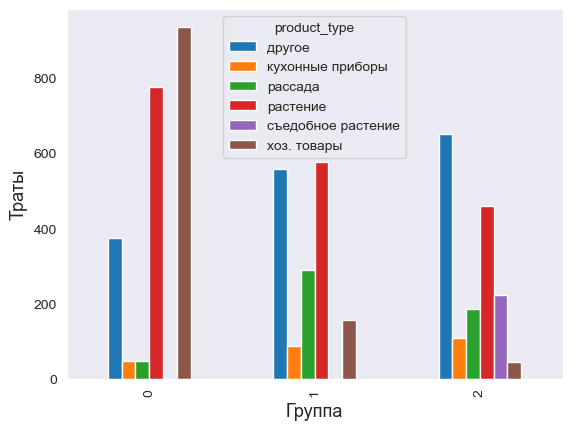

In [41]:
date_data = data.pivot_table(index = 'abc_group',columns = 'product_type', values = 'quantity', aggfunc = 'count')
date_data = date_data.reset_index()
#date_data = date_data.sort_values(by = 'count')
display(date_data)


sns.set_style('dark')
plt.figure(figsize=(10, 4))

date_data.plot.bar()
plt.xlabel('Группа',size = 13)
plt.ylabel("Траты",size = 13)
#plt.grid()
plt.show()

как мы видим:
- В основной категории больше всего хоз товаров и растений
- Во второстепенной расстений и прочих
- В дополнительной категории в основном прочие продукты и растения

В ходе анализа торгового ассортимента было сделано:
- Разделение товара на категории
- Разделение товара на основыной и дополнительный ассотимент
- Выявлено растение, хоз товары и прочие стали самыми популярными типами
- Категория хоз товары - приносит бизнесу больше всего денег
- Основные товары занимают больше 60% всех покупок
- с января по мая сильно растет популярность расстений, потом этот показатель падает и снова популярен в октябре и ноябре
- рассада набирает популяность в апреле и достигает максимума в мая
- хоз товары в три последние месяцы популярна
- съедобные растения в 1,2,4 месяце популярны

В ходе АВС анализа:
- были разделены данные на три категории: Основные, второстепенные и дополнительные
- Основные товары занимают чуть больше 30% всех товаров
- Основной зааботок компания получает именно с основной категории
- Основной категории больше всего хоз товаров и растений
- Во второстепенной расстений и прочих
- В дополнительной категории в основном прочие продукты и растения

### Формулировка и проверка гипотез

проверю гипотезу о цене категорий:

- H0 - в средней цене между оснонвыми и дополнительными товарами нет разницы
- H1 - в средней цене между основными и дополнительными товарами есть разница

In [42]:
print('{0:.3f}'.format(stats.mannwhitneyu(data[data['abc_group']=='A']['price_x'], data[data['abc_group']=='C']['price_x'])[1]))
print('{0:.3f}'.format(data[data['abc_group']=='A']['price_x'].mean()/data[data['abc_group']=='C']['price_x'].mean()-1))

0.000
11.237


- mannwhitneyu получился P-value меньше 0.05 Значит есть причина отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. 
- Наблюдаемое различие в 11.2% средняя цена основного выше средней цены дополнительного. Является стат. значимым

Проверю гипотезу, что люди которые покупают не первый раз - покупают дороже товаы чем люди которые впервые

- H0 нет разницы в цене покупаемых товаров между теми кто в певый раз и не первый
- H1 в средней цене между покупателями которые покупают впервые и не впервые есть разница

Создам новый столбец, в котором будет отмечаться новый пользовательили нет

In [43]:
data_more_2 = data.pivot_table(index = 'customer_id',values = 'quantity', aggfunc = ('count'))
data_more_2 = data_more_2.reset_index()
data_more_2.columns = ('customer_id','count')
data_more_2 = data_more_2.sort_values(by = 'count',ascending = False)
data_more_2 = data_more_2[data_more_2['count']>1]
data_more_2


data['new_customer'] = data['customer_id'].apply(lambda x:"Не новый пользователь" if x in data_more_2['customer_id'].values else 'Новый пользователь')



In [44]:
print('{0:.3f}'.format(stats.mannwhitneyu(data[data['new_customer']=='Не новый пользователь']['price_x'], data[data['new_customer']=='Новый пользователь']['price_x'])[1]))
print('{0:.3f}'.format(data[data['new_customer']=='Новый пользователь']['price_x'].mean()/data[data['new_customer']=='Не новый пользователь']['price_x'].mean()-1))

0.000
0.650


- mannwhitneyu получился P-value меньше 0.05 Значит есть, причина отвергать нулевую гипотезу и считать, что в среднем чеке есть различия у тех кто покупал уже и покупает впервые.
- Наблюдаемое различие в 65% средняя цена товара у людей которые покупают впервые выше чем у тех кто покупает часто. Является стат. значимым

в ходе проверки гипотез было вявлено, что в средней цене между оснонвыми и дополнительными товарами есть разница. что в среднем чеке есть различия у тех кто покупал уже и покупает впервые.

### Вывод

В ходе рыботы было выявлено:
- Почти все заказы сделаны в 2019
- 4,5,10,11 месяцы самые популярные по количеству заказов, шестой особенно сильно выделяется. Самый большой провал в 8 и 9 месяцы
- Муляж и щетка стали самыми продаваемыми товарами
- Сильно зависят траты от месяца. Самые большие траты в 10 и 12 месяц, самые малые в 6,8 и 9
- Выявлено растение, хоз товары и прочие стали самыми популярными типами
- Категория хоз товары - приносит бизнесу больше всего денег
- Основные товары занимают больше 60% всех покупок
- с января по мая сильно растет популярность расстений, потом этот показатель падает и снова популярен в октябре и ноябре
- рассада набирает популяность в апреле и достигает максимума в мая
- хоз товары в три последние месяцы популярна
- съедобные растения в 1,2,4 месяце популярны

- были разделены данные на три категории: Основные, второстепенные и дополнительные
- Основные товары занимают чуть больше 30% всех товаров
- Основной зааботок компания получает именно с основной категории
- Основной категории больше всего хоз товаров и растений
- Во второстепенной расстений и прочих
- В дополнительной категории в основном прочие продукты и растения

в ходе проверки гипотез было вявлено, что в средней цене между оснонвыми и дополнительными товарами есть разница. что в среднем чеке есть различия у тех кто покупал уже и покупает впервые.

Рекомендации для бизнеса:
- Новые пользователи покупают в основном основной и дорогой товар, в то время как опытные покупают и много недорогих товаров. Поэтому рекомендуем бизнесу сделать новым покупателям акции на доп товар, чтобы брали его вместе с основным
- Рекомендация делать акции на товары не сезонные, например на рассады в холодное время или на хоз товары в до открября и на съедобные растения во второй половине года
- Также можно сделать скидку на товары в 6,8 и 9 месяц, чтобы люди покупали в эти месяцы
- Люди которые покупают впервые чаще тратят большие суммы и покупают основные категории, их надо впервый раз привелкать основной категорией и делать скидки на дополнительные 


- Ссылка на презентацию:
https://docs.google.com/presentation/d/1w5XbQhJ2A41PITdfWDt5Hz9kHrOwdTr6-0vQUZ6VrAs/edit#slide=id.p
- PDF: https://disk.yandex.ru/i/8MpifoI7eRDqpw